<a href="https://colab.research.google.com/github/fernxndess/eu-facul/blob/main/t1MD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabalho 1 - Mineração de dados

Pedro Augusto Mota Barreto da Rocha

Guilherme Fernandes de Azevedo Rocha

Fontes escolhidas:

- PIB dos munícipios (Base de dados 2010 - 2021) Link: [https://www.ibge.gov.br/estatisticas/economicas/contas-nacionais/]
- PNAD Contínua (Pessoas de 14 anos ou mais de idade, ocupadas na semana de referência, por posição na ocupação no trabalho principal, primeiro trimeste de cada ano 2020 - 2025) Link: [https://www.ibge.gov.br/estatisticas/sociais/trabalho/9173-pesquisa-nacional-por-amostra-de-domicilios-continua-trimestral.html?=&t=microdados]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Na célula acima, importamos as bibliotecas do pandas.

In [ ]:
planilha = pd.read_excel('/content/Tabela1.xlsx', None)

**Nessa célula de código, importamos os dados em formato de tabela sobre o PIB dos Municípios.**

Observe:

In [ ]:
planilha

{'PIB dos Municípios':         Ano  Código da Grande Região Nome da Grande Região  \
 0      2010                        1                 Norte   
 1      2010                        1                 Norte   
 2      2010                        1                 Norte   
 3      2010                        1                 Norte   
 4      2010                        1                 Norte   
 ...     ...                      ...                   ...   
 66820  2021                        5          Centro-oeste   
 66821  2021                        5          Centro-oeste   
 66822  2021                        5          Centro-oeste   
 66823  2021                        5          Centro-oeste   
 66824  2021                        5          Centro-oeste   
 
        Código da Unidade da Federação Sigla da Unidade da Federação  \
 0                                  11                            RO   
 1                                  11                            RO   
 2  

In [ ]:
planilha2 = pd.read_excel('/content/Tabela2.xlsx', None)

**E nessa célula acima, importamos a tabela com os dados do PNAD Contínua sobre as pessoas de 14 anos ou mais de idade, ocupadas na semana de referência, por posição na ocupação no trabalho principal, primeiro trimeste de cada ano 2020 - 2025.**

Veja:

In [ ]:
planilha2

{'Tabela':    Tabela 4092 - Pessoas de 14 anos ou mais de idade, por condição em relação à força de trabalho e condição de ocupação  \
 0   Variável - Pessoas de 14 anos ou mais de idade...                                                                      
 1        Brasil, Grande Região e Unidade da Federação                                                                      
 2                                                 NaN                                                                      
 3                                                 NaN                                                                      
 4                                              Brasil                                                                      
 5                                               Norte                                                                      
 6                                            Nordeste                                                             

Após importar as tabelas e iniciá-las no notebook virtual, agora começaremos a filtrar e analisar os dados.

**Gráficos e análises**

1: Gráfico de barras - PIB per capita nas regiões do Brasil (Tabela 1)

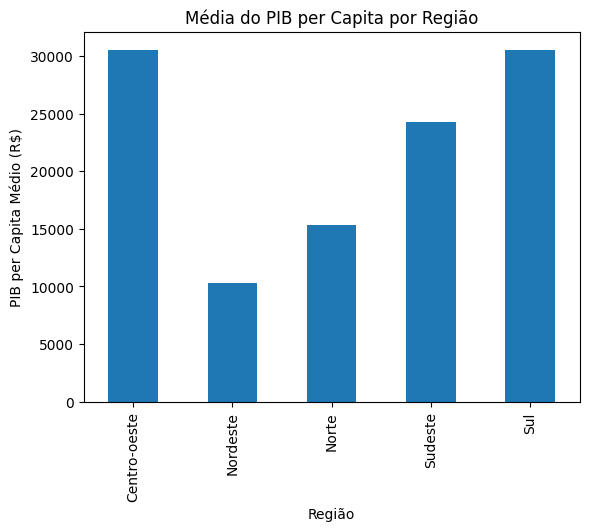

In [ ]:
df = planilha['PIB dos Municípios']
pib_per_capita_regiao = df.groupby('Nome da Grande Região')['Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)'].mean()

pib_per_capita_regiao.plot(kind='bar')
plt.title('Média do PIB per Capita por Região')
plt.xlabel('Região')
plt.ylabel('PIB per Capita Médio (R$)')
plt.show()

**Análise:**

O gráfico demonstra o PIB per capita do páis, ou seja, o PIB bruto dividido pela população de cada região.

Podemos observar que as regiões Centro-oeste e Sul, se destacam no gráfico, possuíndo um maior valor comparados as outras regiões.

Gostaríamos de pontuar que, embora a região Sudeste seja a lider econômica do páis, contendo o maior PIB, ela, no entanto, possui uma elevada população, logo seu PIB per capita acaba sendo menor em relação as destacadas acima.

2: Gráfico de barras - Ativididade com maior valor adicionado bruto por região (Tabela 1)

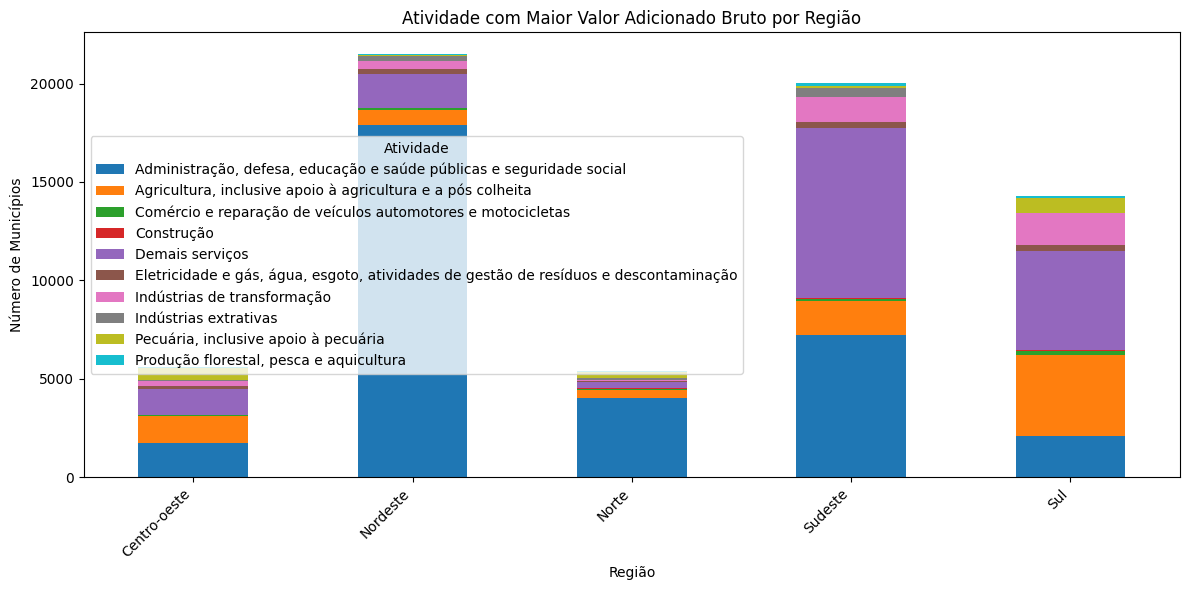

In [ ]:
atividade_maiorvalor = df.groupby('Nome da Grande Região')['Atividade com maior valor adicionado bruto'].value_counts().unstack().fillna(0)

atividade_maiorvalor.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Atividade com Maior Valor Adicionado Bruto por Região')
plt.xlabel('Região')
plt.ylabel('Número de Municípios')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Atividade')
plt.tight_layout()
plt.show()

**Análise:**

Já neste gráfico, temos a distribução do valor adicionado ao PIB que cada atividade gera em suas respectivas regiões do páis.

Podemos notar que nas regiões Nordeste e Sudeste, temos os maiores números de municípios, no entanto, nota-se que as atividades "Demais serviços" e "Indústrias de transfomação" têm um maior valor na região Sudeste comparada à região Nordeste.

Podemos observar também que, na região Nordeste, o que se destaca é o elevado valor da atividade "Administração, defesa, educação..." em comparação com as outras regiões.

Ademais, na região Sul, devemos destacar o grande número esperado em relação a atividade "Agricultura", indicando a importância desse setor na economia da região.

3: Gráfico de Pizza - Proporção do valor adicionado bruto (Tabela 1)

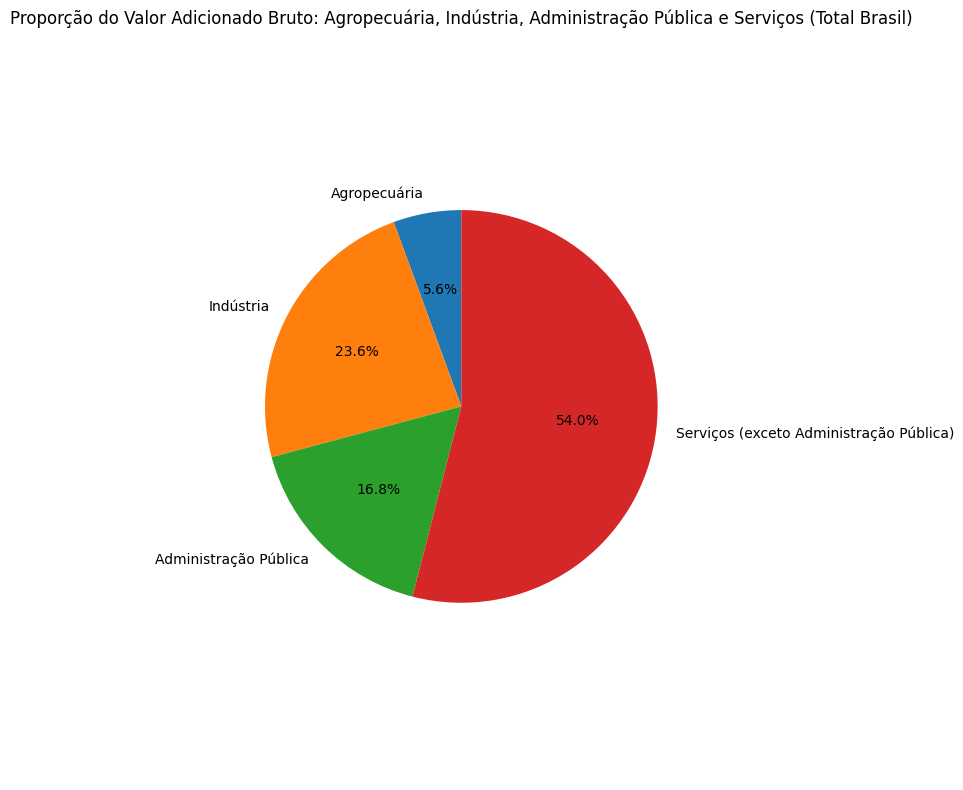

In [ ]:
agro_industria_adm_servicos_total = df[['Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)', 'Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)', 'Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)', 'Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)']].sum()

plt.figure(figsize=(8, 8))
plt.pie(agro_industria_adm_servicos_total, labels=['Agropecuária', 'Indústria', 'Administração Pública', 'Serviços (exceto Administração Pública)'], autopct='%1.1f%%', startangle=90)
plt.title('Proporção do Valor Adicionado Bruto: Agropecuária, Indústria, Administração Pública e Serviços (Total Brasil)')
plt.axis('equal')
plt.tight_layout()
plt.show()

**Análise:**

Dessa vez, estamos analisando o valor adicionado bruto do país com um gráfico em formato de pizza, evidenciando o percentual de cada um.

Claramente, é possível notar que a atividade "Serviços" possui grande impacto na economia do Brasil, ocupando mais da metade do gráfico.

Nota-se também que a Indústria há uma grande importância no que diz respeito ao PIB do páis, tendo a segunda maior porcentagem de espaço do gráfico.

Por fim, gostaríamos de comentar sobre a Agropecuária, que ocupa apenas 5.6% do gráfico. Em um país como o nosso, que possuí condições bastante favoráveis para o desempenho dessa atividade, nos surpreende uma parcela tão pequena.

4: Gráfico de linhas - PIB por região ao longo dos anos (Tabela 1)

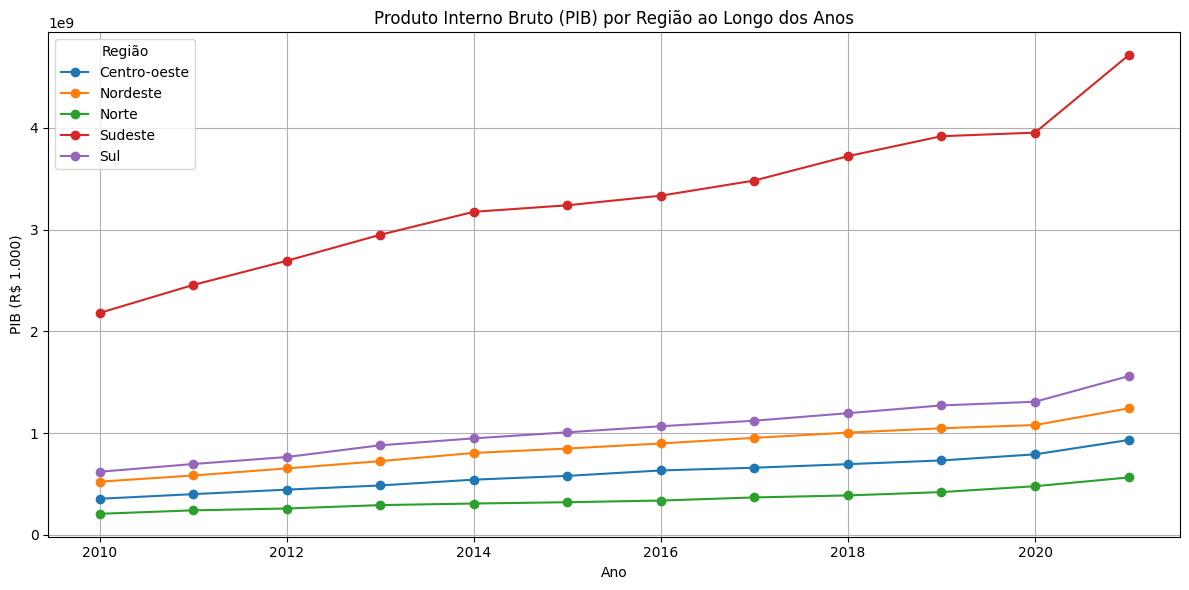

In [ ]:
pib_por_regiao_ano = df.groupby(['Ano', 'Nome da Grande Região'])['Produto Interno Bruto, \na preços correntes\n(R$ 1.000)'].sum().unstack()

pib_por_regiao_ano.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Produto Interno Bruto (PIB) por Região ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('PIB (R$ 1.000)')
plt.legend(title='Região')
plt.grid(True)
plt.tight_layout()
plt.show()

**Análise:**

Nesse gráfico de linhas, estamos analisando o valor do PIB durante uma década 2010-2021 em cada região do Brasil.

Primeiramente, nota-se que a região Sudeste, como vista também nos gráficos acima, destoa das demais regiões, tendo em vista que possui um PIB bem mais elevado e que evoluí de forma mais acentuada que as outras.

Nota-se também que as outras regiões sempre andam lado a lado, evoluindo de forma parecida e tendo valores próximos.

5: Gráfico de dispersão - Relação entre ocupação e desocupação (Tabela 2)

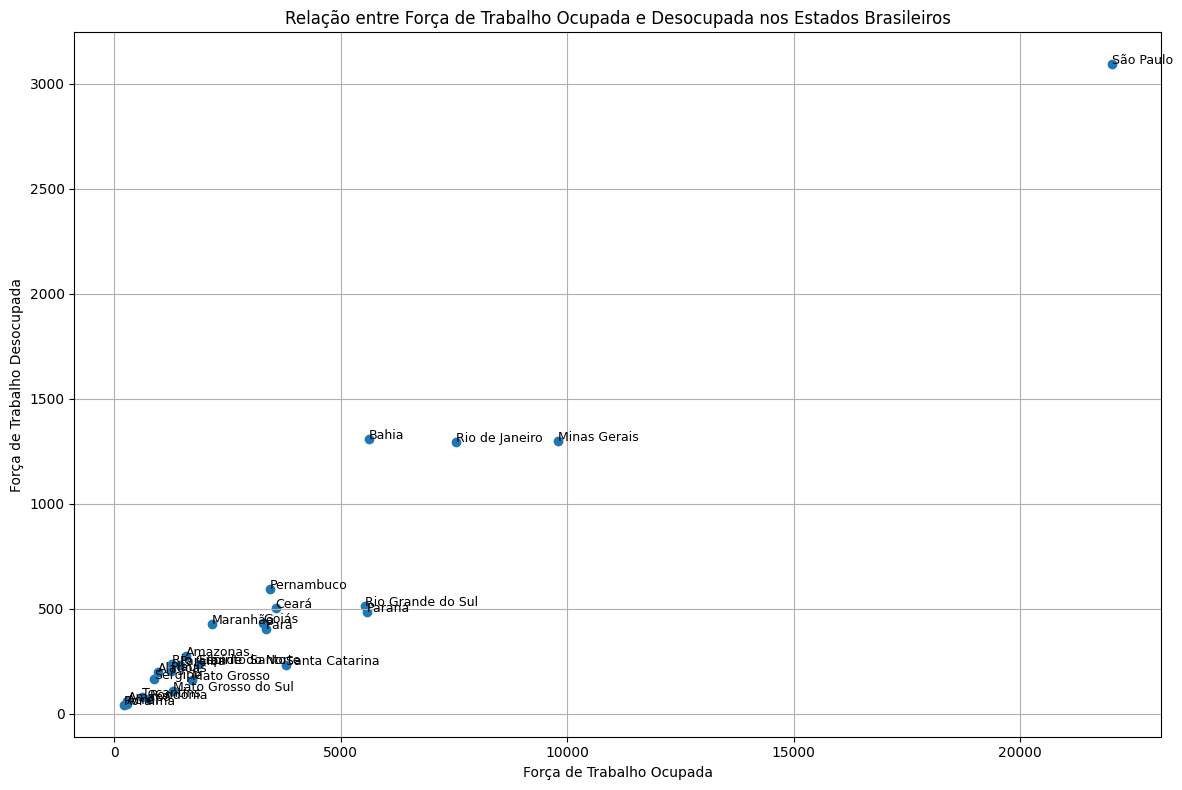

In [ ]:
df2 = planilha2['Tabela']

df2.columns = df2.columns.str.strip().str.replace('\n', ' ')

data_start_row = 4
data_end_row = 37

df_filtered = df2.iloc[data_start_row:data_end_row].copy()

df_filtered.rename(columns={
    'Unnamed: 3': 'Ocupados',
    'Unnamed: 4': 'Desocupados',
    'Tabela 4092 - Pessoas de 14 anos ou mais de idade, por condição em relação à força de trabalho e condição de ocupação': 'Localidade'
}, inplace=True)

state_data_start_row_filtered_df = 6
state_data_end_row_filtered_df = 32


df_states = df_filtered.iloc[state_data_start_row_filtered_df:state_data_end_row_filtered_df].copy()

df_states['Ocupados'] = pd.to_numeric(df_states['Ocupados'], errors='coerce')
df_states['Desocupados'] = pd.to_numeric(df_states['Desocupados'], errors='coerce')

df_states.dropna(subset=['Ocupados', 'Desocupados'], inplace=True)

plt.figure(figsize=(12, 8))
plt.scatter(df_states['Ocupados'], df_states['Desocupados'])

for i, row in df_states.iterrows():
    plt.text(row['Ocupados'], row['Desocupados'], row['Localidade'], fontsize=9)

plt.title('Relação entre Força de Trabalho Ocupada e Desocupada nos Estados Brasileiros')
plt.xlabel('Força de Trabalho Ocupada')
plt.ylabel('Força de Trabalho Desocupada')
plt.grid(True)
plt.tight_layout()
plt.show()

**Análise:**

Nesse gráfico de dispersão, observaremos a quantidade de pessoas ocupadas (empregadas) x desocupadas (desempregadas) nos estados do país.

É possível observar que, como São Paulo possui uma elevada população e é a principal capital econômica do país, temos um número grande de pessoas empregadas mas também um valor muito alto de pessoas desempregadas, como podemos ver no gráfico.

Também é possível notar que, os estados do Rio de Janeiro, Bahia e Minas Gerais possuem um valor alto de pessoas ocupadas e desocupadas, por serem grandes capitais e oferecem maiores oportunidades de emprego.

Por último, vemos que os demais estados tem valores muito parecidos por não serem grandes centros urbanos como as demais citadas acima.

6: Gráfico Boxplot - Distribuição de impostos líquidos de subsídios > 10.000.000 nos estados brasileiros (Tabela 1)

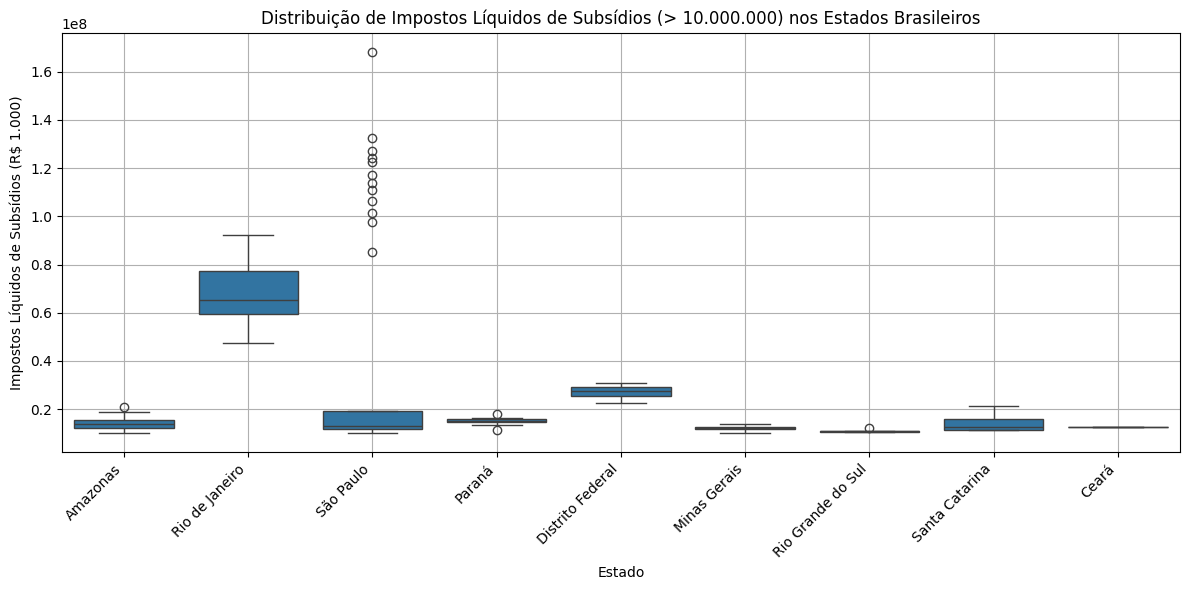

In [ ]:
import seaborn as sns

df = planilha['PIB dos Municípios']

df.rename(columns={
    'Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)': 'Impostos Líquidos de Subsídios'
}, inplace=True)

df['Impostos Líquidos de Subsídios'] = pd.to_numeric(df['Impostos Líquidos de Subsídios'], errors='coerce')

df_filtered = df[df['Impostos Líquidos de Subsídios'] > 10000000].copy()

df_filtered.dropna(subset=['Impostos Líquidos de Subsídios', 'Nome da Unidade da Federação'], inplace=True)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Nome da Unidade da Federação', y='Impostos Líquidos de Subsídios', data=df_filtered)

plt.title('Distribuição de Impostos Líquidos de Subsídios (> 10.000.000) nos Estados Brasileiros')
plt.xlabel('Estado')
plt.ylabel('Impostos Líquidos de Subsídios (R$ 1.000)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

**Análise:**

Neste boxplot, observamos a distribuição de impostos nos estados do país. Para isso fizemos um filtro para que pudessemos ver somente os principais estados, com valores de impostos maiores que R$10.000.000.

Primeiramente, nota-se que o estado do Rio de Janeiro possui a maior mediana e uma grande dispersão em comparação com os outros estados. Já o estado de São Paulo não possui uma mediana alta, mas conta com muitos *outliers*, o que indica a presença de algumas empresas ou entidades com valores de subsídio extremamente elevados.

Ademais, os estados Amazonas, Paraná, Minas Gerais, Rio Grande do Sul, Santa Catarina e Ceará, possuem valores medianos mais baixos e uma dispersão moderada.

Por fim, o Distrito Federal possui uma mediana alta, mas baixa variabilidade, o que indica valores mais concentrados e pouca dispersão.

7: Mapas coropléticos - Força de trabalho nos estados do Brasil (Tabela 2)

In [ ]:
%pip install geopandas

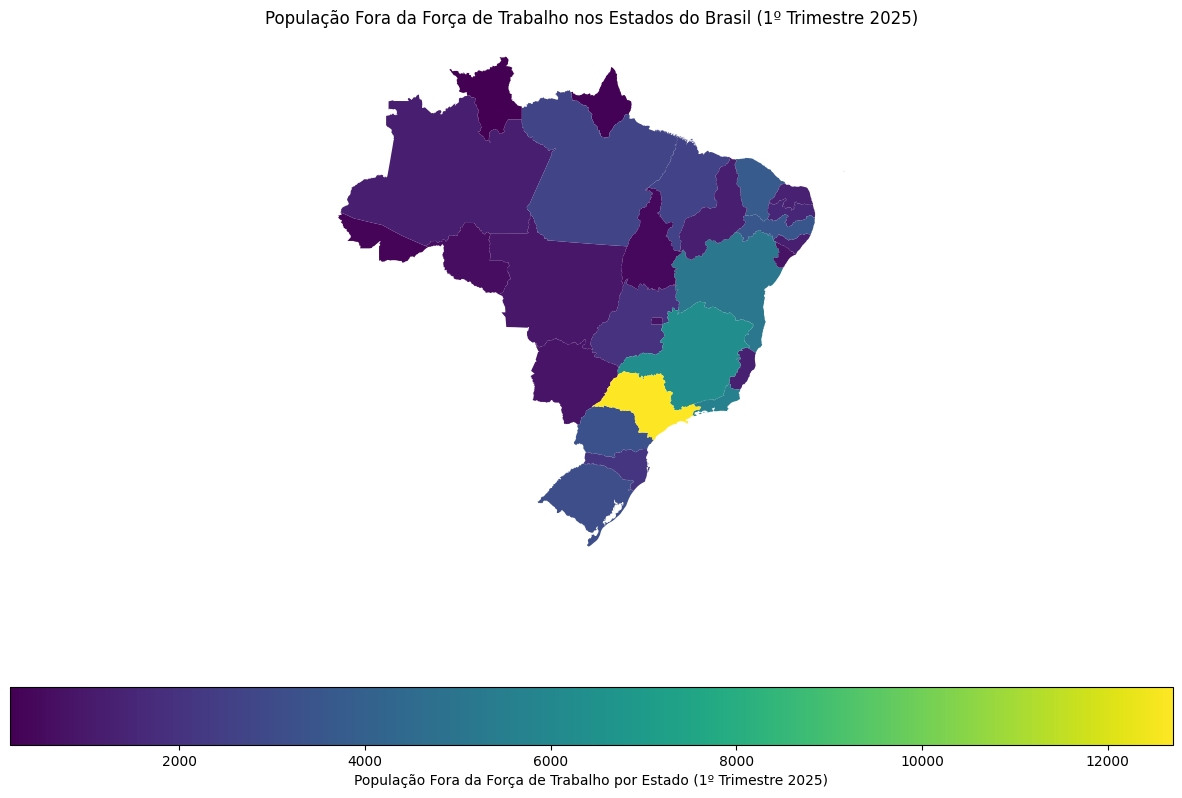

In [ ]:
import geopandas as gpd

df2 = planilha2['Tabela']
df2.columns = df2.columns.str.strip().str.replace('\n', ' ')

data_start_row = 4
data_end_row = 37

df_filtered = df2.iloc[data_start_row:data_end_row].copy()

df_filtered.rename(columns={
    'Unnamed: 30': 'Fora da Força de Trabalho 1º Trimestre 2025',
    'Tabela 4092 - Pessoas de 14 anos ou mais de idade, por condição em relação à força de trabalho e condição de ocupação': 'Localidade'
}, inplace=True)

state_data_start_row_filtered_df = 6
state_data_end_row_filtered_df = 37

df_states = df_filtered.iloc[state_data_start_row_filtered_df:data_end_row].copy()


df_states['Fora da Força de Trabalho 1º Trimestre 2025'] = pd.to_numeric(df_states['Fora da Força de Trabalho 1º Trimestre 2025'], errors='coerce')
df_states.dropna(subset=['Fora da Força de Trabalho 1º Trimestre 2025'], inplace=True)


try:
    brazil_geo = gpd.read_file("https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson")
except Exception as e:
    print(f"Error loading GeoJSON: {e}")
    brazil_geo = None

if brazil_geo is not None:
    brazil_geo['name'] = brazil_geo['name'].str.replace(' ', '_')
    df_states['Localidade'] = df_states['Localidade'].str.replace(' ', '_')


    merged_df = brazil_geo.set_index('name').join(df_states.set_index('Localidade'))


    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    merged_df.plot(column='Fora da Força de Trabalho 1º Trimestre 2025', ax=ax, legend=True,
                   legend_kwds={'label': "População Fora da Força de Trabalho por Estado (1º Trimestre 2025)",
                                'orientation': "horizontal"})


    ax.set_title('População Fora da Força de Trabalho nos Estados do Brasil (1º Trimestre 2025)')
    ax.set_axis_off()

    plt.show()
else:
    print("Could not generate map due to GeoJSON loading error.")

**Análise:**

Nesse primeiro gráfico coroplético, observaremos a quantidade de pessoas nos estados que estão fora da força de trabalho, ou seja, pessoas que não podem ou não conseguem trabalhar.

De antemão, podemos ver o estado de São Paulo mais uma vez se destaca com um alto número de pessoas fora da força de trabalho, indicando que embora ele seja uma grande cidade cheia de oportunidades, há também muitas pessoas que ou ainda não ingressaram na vida profissional, ou que não podem por motivos de incapacitação, ou que já se aposentaram.

Também nota-se que os estados Minas Gerais e Rio de Janeiro são os estados com maiores valores depois de São Paulo.

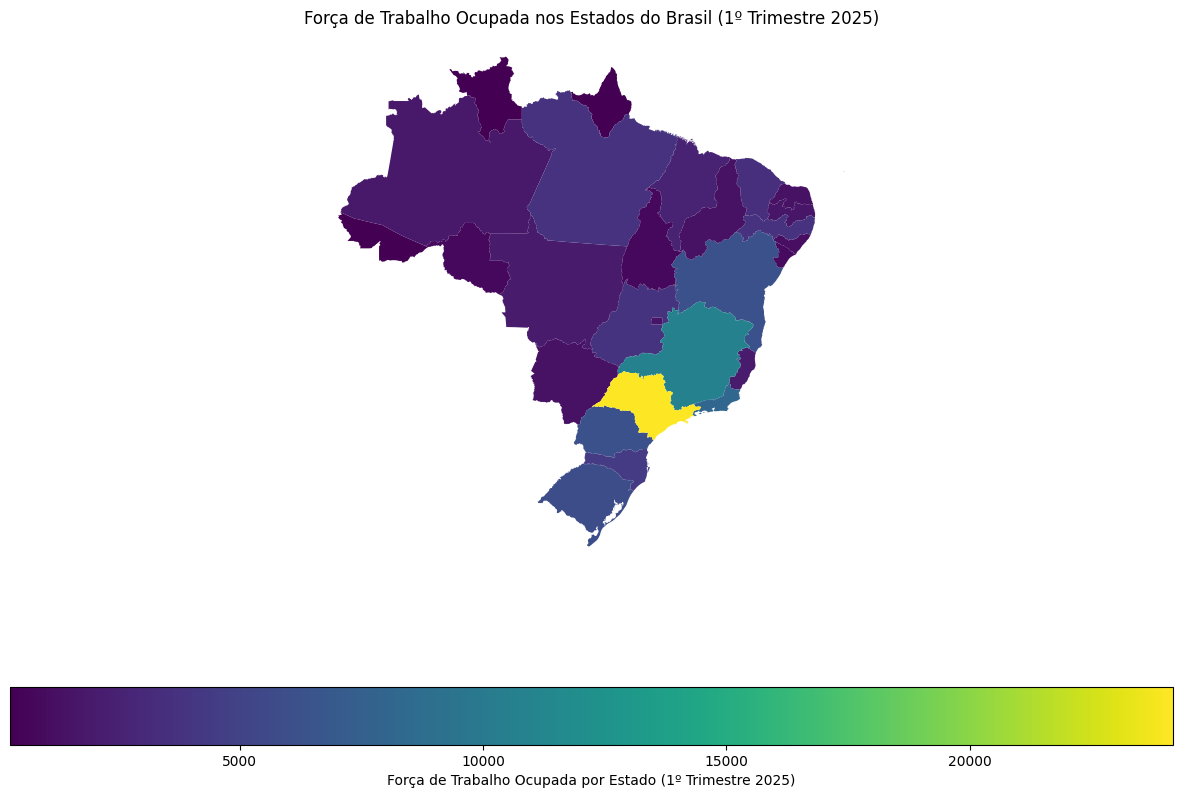

In [ ]:
import geopandas as gpd

df2 = planilha2['Tabela']
df2.columns = df2.columns.str.strip().str.replace('\n', ' ')

data_start_row = 4
data_end_row = 37

df_filtered = df2.iloc[data_start_row:data_end_row].copy()

df_filtered.rename(columns={
    'Unnamed: 28': 'Ocupados 1º Trimestre 2025',
    'Tabela 4092 - Pessoas de 14 anos ou mais de idade, por condição em relação à força de trabalho e condição de ocupação': 'Localidade'
}, inplace=True)


state_data_start_row_filtered_df = 6
state_data_end_row_filtered_df = 37

df_states = df_filtered.iloc[state_data_start_row_filtered_df:data_end_row].copy()

df_states['Ocupados 1º Trimestre 2025'] = pd.to_numeric(df_states['Ocupados 1º Trimestre 2025'], errors='coerce')
df_states.dropna(subset=['Ocupados 1º Trimestre 2025'], inplace=True)

try:
    brazil_geo = gpd.read_file("https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson")
except Exception as e:
    print(f"Error loading GeoJSON: {e}")
    brazil_geo = None

if brazil_geo is not None:
    brazil_geo['name'] = brazil_geo['name'].str.replace(' ', '_')
    df_states['Localidade'] = df_states['Localidade'].str.replace(' ', '_')

    merged_df = brazil_geo.set_index('name').join(df_states.set_index('Localidade'))

    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    merged_df.plot(column='Ocupados 1º Trimestre 2025', ax=ax, legend=True,
                   legend_kwds={'label': "Força de Trabalho Ocupada por Estado (1º Trimestre 2025)",
                                'orientation': "horizontal"})

    ax.set_title('Força de Trabalho Ocupada nos Estados do Brasil (1º Trimestre 2025)')
    ax.set_axis_off()

    plt.show()
else:
    print("Could not generate map due to GeoJSON loading error.")

**Análise:**

Nesse segundo gráfico coroplético, observaremos a quantidade de pessoas nos estados que estão ocupadas, ou seja, pessoas que estão empregadas ou trabalhando de alguma maneira.

De antemão, podemos ver o estado de São Paulo mais uma vez se destaca, desta vez, com um alto número de pessoas ocupadas, evidenciando mais uma vez que é uma grande cidade cheia de oportunidades.

Também nota-se que os estados Minas Gerais e Rio de Janeiro, mais uma vez, são os estados com maiores valores depois de São Paulo, porém, agora, o estado do Rio perdeu números.

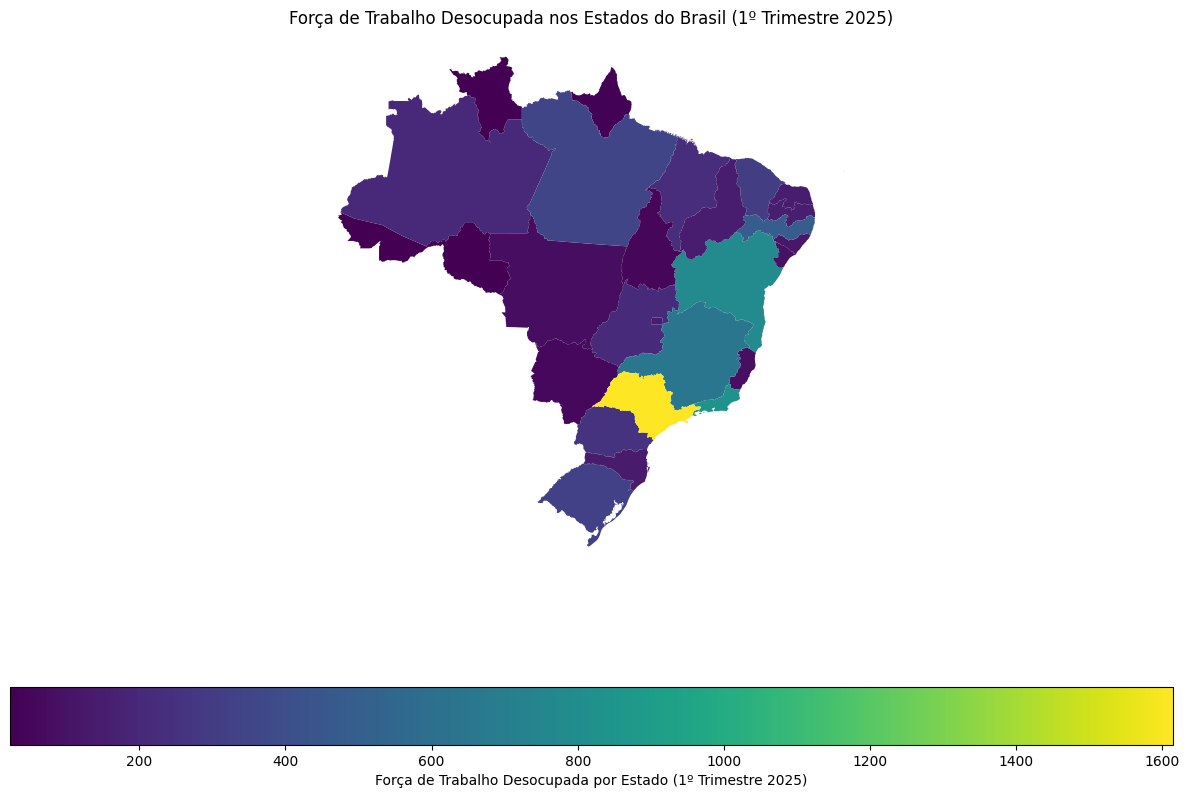

In [ ]:
import geopandas as gpd

df2 = planilha2['Tabela']
df2.columns = df2.columns.str.strip().str.replace('\n', ' ')

data_start_row = 4
data_end_row = 37

df_filtered = df2.iloc[data_start_row:data_end_row].copy()

df_filtered.rename(columns={
    'Unnamed: 29': 'Desocupados 1º Trimestre 2025',
    'Tabela 4092 - Pessoas de 14 anos ou mais de idade, por condição em relação à força de trabalho e condição de ocupação': 'Localidade'
}, inplace=True)

state_data_start_row_filtered_df = 6
state_data_end_row_filtered_df = 37

df_states = df_filtered.iloc[state_data_start_row_filtered_df:data_end_row].copy()

df_states['Desocupados 1º Trimestre 2025'] = pd.to_numeric(df_states['Desocupados 1º Trimestre 2025'], errors='coerce')
df_states.dropna(subset=['Desocupados 1º Trimestre 2025'], inplace=True)

try:
    brazil_geo = gpd.read_file("https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson")
except Exception as e:
    print(f"Error loading GeoJSON: {e}")
    brazil_geo = None

if brazil_geo is not None:
    brazil_geo['name'] = brazil_geo['name'].str.replace(' ', '_')
    df_states['Localidade'] = df_states['Localidade'].str.replace(' ', '_')


    merged_df = brazil_geo.set_index('name').join(df_states.set_index('Localidade'))

    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    merged_df.plot(column='Desocupados 1º Trimestre 2025', ax=ax, legend=True,
                   legend_kwds={'label': "Força de Trabalho Desocupada por Estado (1º Trimestre 2025)",
                                'orientation': "horizontal"})

    ax.set_title('Força de Trabalho Desocupada nos Estados do Brasil (1º Trimestre 2025)')
    ax.set_axis_off()

    plt.show()
else:
    print("Could not generate map due to GeoJSON loading error.")

**Análise:**

Agora, no terceiro e último gráfico, vamos analisar a quantidade de pessoas nos estados que estão desocupadas, ou seja, pessoas que estão desempregadas, a procura ou não de novas oportunidades.

De antemão, novamente, podemos ver o estado de São Paulo se destaca, desta vez, com um alto número de pessoas que não estão trabalhando.

Por fim, os estados do Rio de Janeiro e Bahia são os estados com os maiores valores após São Paulo, logo podemos analisar que nesses lugares temos uma grande taxa de desemprego, já que também são grandes cidades que atraem pessoas à procura de oportunidades, porém acabam não conseguindo muitas das vezes.

